In [1]:
# Add all necessary imports here
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.reload_library()
plt.style.use("ggplot")

### Cover Slide


<center>
<img src="img/saluslab.png" width="100%" />
</center>

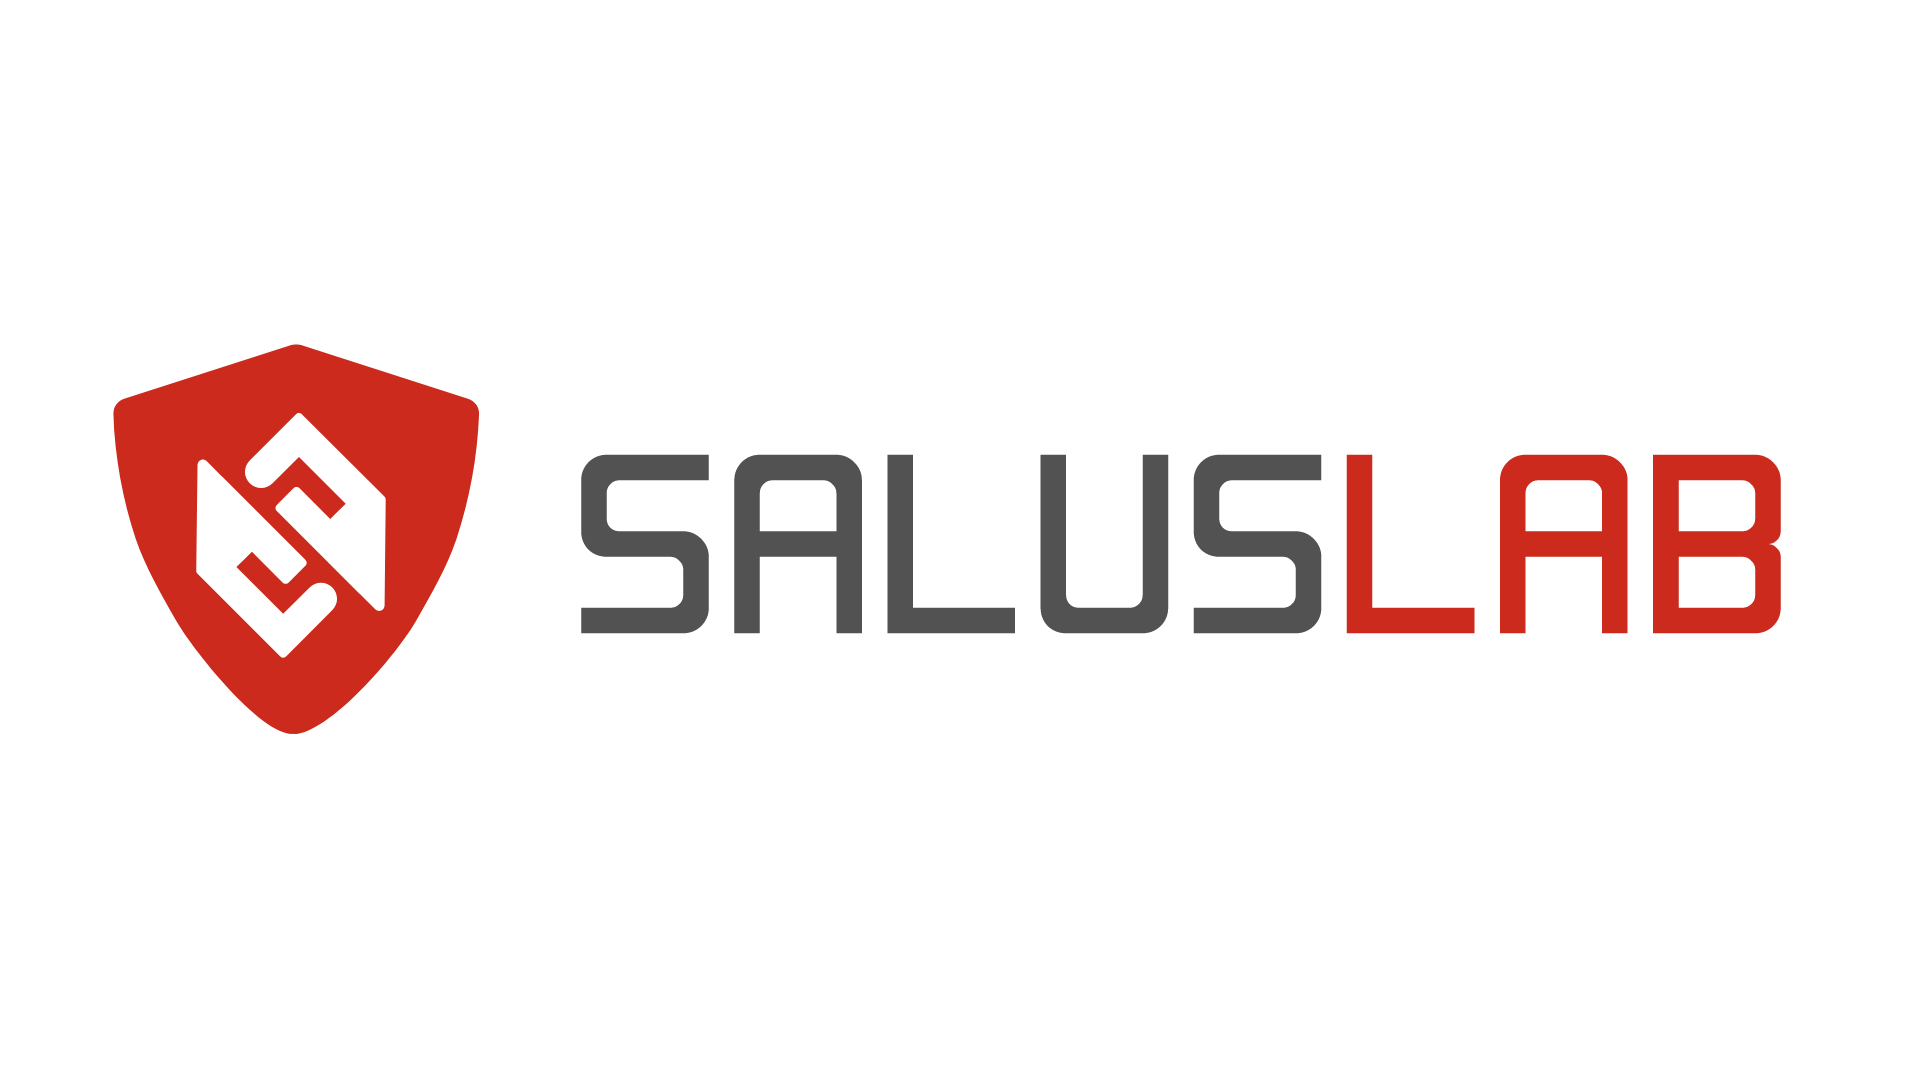

In [1]:
from IPython.display import Image
Image(filename='img/saluslab.png', width=400)

# What is the problem?

# Import the necessary libraries

In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import cufflinks as cf
import folium
from folium.plugins import HeatMap
from geopy.geocoders import Nominatim


In [129]:
# sns.axes_style()

# custom = {"grid.color": "white",
# 'axes.labelsize': 30,
#  'axes.titlesize': 30,
#  'font.size': 28,
#  'grid.linewidth': 2,
#  'legend.fontsize': 16.0,
#  'lines.linewidth': 2.8000000000000003,
#  'lines.markeredgewidth': 0.0,
#  'lines.markersize': 11.200000000000001,
#  'patch.linewidth': 0.48,
#  'xtick.labelsize': 16.0,
#  'xtick.major.pad': 11.200000000000001,
#  'xtick.major.width': 1.6,
#  'xtick.minor.width': 0.8,
#  'ytick.labelsize': 16.0,
#  'ytick.major.pad': 11.200000000000001,
#  'ytick.major.width': 1.6,
#  'ytick.minor.width': 0.8,
#  'figure.facecolor': 'black',
# }
# sns.set_style("darkgrid", rc = custom)
sns.set_theme('notebook', style='darkgrid')
plt.style.use("ggplot")
color_palette = sns.color_palette("blend:#CB2A1D,#000", 10)
color_palette


[(0.796078431372549, 0.16470588235294117, 0.11372549019607843),
 (0.7086658977316416, 0.14662053056516725, 0.10123798539023453),
 (0.6212533640907343, 0.12853517877739332, 0.08875048058439061),
 (0.530718954248366, 0.10980392156862745, 0.0758169934640523),
 (0.4433064206074587, 0.09171856978085352, 0.06332948865820838),
 (0.3527720107650903, 0.07298731257208765, 0.05039600153787005),
 (0.26535947712418306, 0.054901960784313725, 0.03790849673202615),
 (0.17482506728181468, 0.03617070357554786, 0.024975009611687818),
 (0.0874125336409074, 0.01808535178777393, 0.012487504805843916),
 (0.0, 0.0, 0.0)]

# Read the data

In [22]:
# read all the data sets
lockbit = pd.read_csv('data/lockbit2-v5.csv')
bianlian = pd.read_csv('data/BianLian.csv')
blackbasta = pd.read_csv('data/BlackBasta-v2.csv')
playnews = pd.read_csv('data/PlayNews.csv')
royal = pd.read_csv('data/Royal.csv')
vicesociety = pd.read_csv('data/ViceSociety.csv')
# concatenate all the data sets
df_attacked = pd.concat([lockbit, bianlian, blackbasta, playnews, royal, vicesociety], ignore_index=True)
# drop "date_added" and "progress" columns
df_attacked.drop(['date_added', 'progress'], axis=1, inplace=True)


In [23]:
unattacked_lockbit = pd.read_csv('data/unattacked-lockbit.csv')
unattacked_bianlian = pd.read_csv('data/unattacked-bianlian.csv')
unattacked_blackbasta = pd.read_csv('data/unattacked-blackbasta.csv')
unattacked_playnews = pd.read_csv('data/unattacked-play-news.csv')
unattacked_royal = pd.read_csv('data/unattacked-royal.csv')
unattacked_vicesociety = pd.read_csv('data/unattacked-vice-society.csv')
# concatenate all the data sets
df_unattacked = pd.concat([unattacked_lockbit, unattacked_bianlian, unattacked_blackbasta, unattacked_playnews, unattacked_royal, unattacked_vicesociety], ignore_index=True)
# drop "date_added" and "progress" columns
df_unattacked.drop(['date_added', 'progress'], axis=1, inplace=True)

# Clean the data

## general cleaning (applied to the whole dataset)

In [52]:
df_attacked['ispublished'] = df_attacked['ispublished'].apply(lambda x: False if x == "0%" or x==False else True)
df_attacked['ispublished'].unique()

array([ True, False])

In [25]:
# TODO: add the code to process the revenue range, then plot it

# specific cleaning (applied only when visualizing that column)

In [26]:
# create a copy of the data frame
df_attacked_industry = df_attacked.copy()
# drop the null values from the "industry" column
df_attacked_industry.dropna(subset=['industry'], inplace=True)

## Descriptive analysis of the data through plots

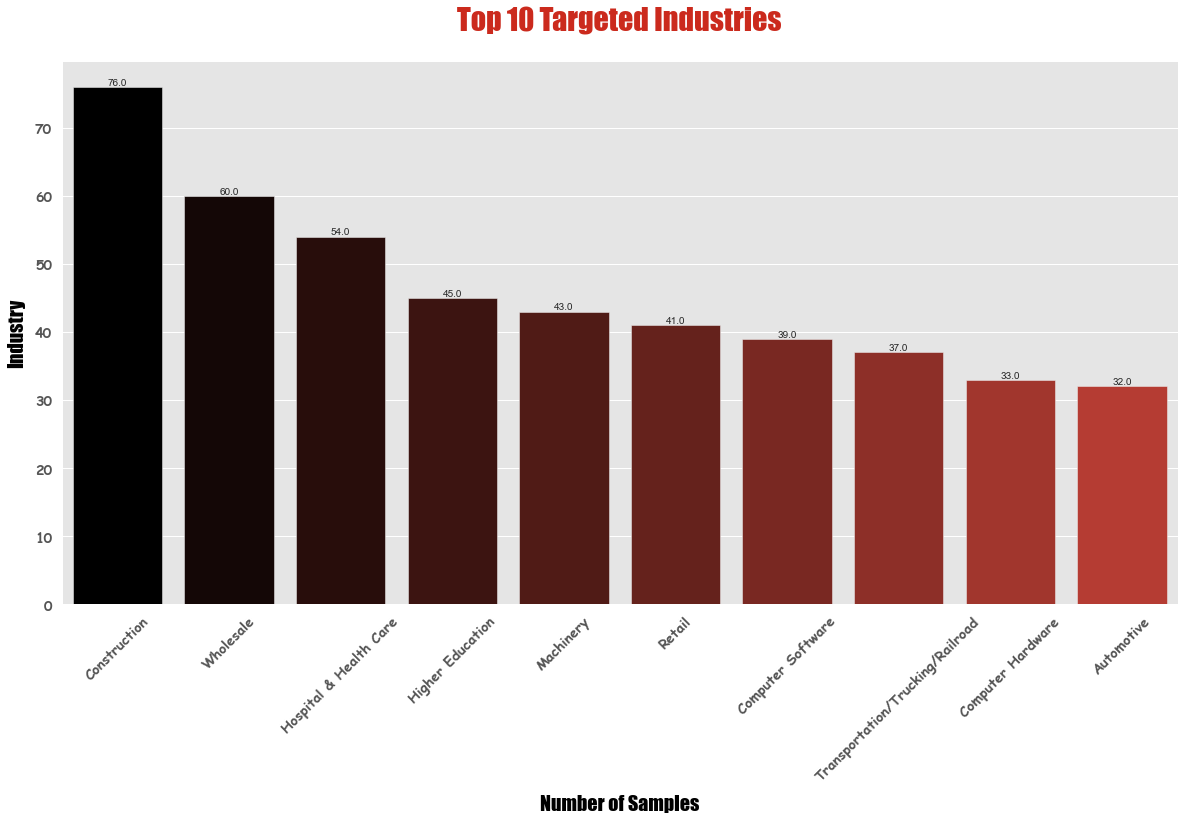

In [137]:
# print the unique values for 'industry' column
# print(new_df['industry'].unique())
# plot the number of samples for top 10 industries in the data set
plt.figure(figsize=(20, 10))
color_palette = sns.color_palette("blend:#CB2A1D,#000", 10)
ax = sns.countplot(x='industry', data=df_attacked_industry, order=df_attacked_industry['industry'].value_counts().iloc[:10].index, palette=color_palette[::-1])
ax.bar_label(ax.containers[0], fmt='%.1f')
# rotate the plot
plt.xticks(rotation=45, fontsize=14, fontweight='bold', fontfamily='cursive')
plt.yticks(fontsize=14, fontweight='bold', fontfamily='cursive')
plt.title('Top 10 Targeted Industries', fontdict={'fontsize': 30, 'fontweight': 'bold', 'color': '#CB2A1D', 'fontfamily': 'fantasy'}, pad=30, )
plt.xlabel('Number of Samples', fontdict={'fontsize': 20, 'fontweight': 'medium', 'color': '#000', 'fontfamily': 'fantasy'}, labelpad=10)
plt.ylabel('Industry', fontdict={'fontsize': 20, 'fontweight': 'medium', 'color': '#000', 'fontfamily': 'fantasy'}, labelpad=10)
plt.show()

<__array_function__ internals>:180: RuntimeWarning:

Converting input from bool to <class 'numpy.uint8'> for compatibility.



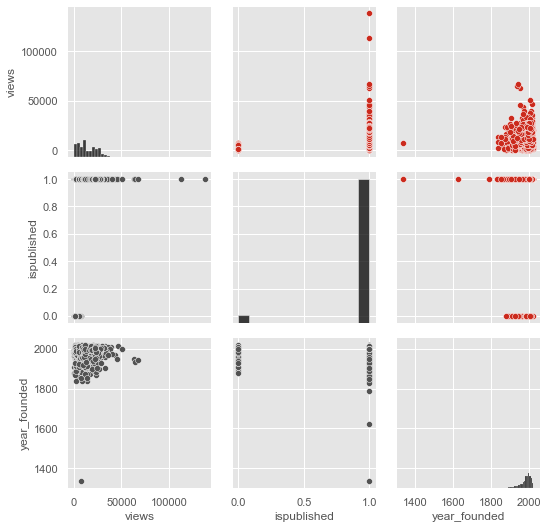

In [131]:
g = sns.PairGrid(df_attacked[["views", "ispublished", "year_founded"]])
g.map_upper(sns.scatterplot,color='#CB2A1D')
g.map_lower(sns.scatterplot, color='#525252')
g.map_diag(sns.histplot, color='black')
plt.show()

# Fragment

Press the right arrow.

- I am a Fragement

- I am another one

### Divider

# Markdown Examples

#### Text

It's very easy to make some words **bold** and other words *italic* with Markdown. You can even [link to Google!](http://google.com)

# Headline Subslide
#### Code

```javascript
var s = "JavaScript syntax highlighting";
alert(s);
```
 
```python
s = "Python syntax highlighting"
print s
```
 
```
No language indicated, so no syntax highlighting. 
But let's throw in a <b>tag</b>.
```

# Python example

#### Code
```python
# This program adds up integers in the command line
import sys
try:
    total = sum(int(arg) for arg in sys.argv[1:])
    print 'sum =', total
except ValueError:
    print 'Please supply integer arguments'
```

# Headline Subslide

#### Lists

Sometimes you want numbered lists:

1. Item 1
2. Item 2
3. Item 3
   * Item 3a
   * Item 3b


# Headline Subslide

#### Lists

Sometimes you want bullet points:

* Item 1
* Item 2
  * Item 2a
  * Item 2b
* This is a long long long long long long long long long long long long long long long long long long long long long long long long long list

# Headline Subslide
#### Blockquotes

As Kanye West said:

> We're living the future so
> the present is our past.

#### inline code
I think you should use an
`<addr>` element here instead.

# Table

| Tables        | Are           | Cool  |
| ------------- |:-------------:| -----:|
| col 3 is      | right-aligned | $1600 |
| col 2 is      | centered      |   $12 |
| zebra stripes | are neat      |    $1 |

# Images
If you want to embed images, this is how you do it:

![Color](img/colorcontext.png)

# Links

- https://guides.github.com/features/mastering-markdown/

- https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet

### Q&A Slide